#Profil
```
# Nama     : Daniel Christanto
# Username : celasdio
# Email    : danielchristanto30@gmail.com
```



In [1]:
#Import Modul yang diperlukan
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
import shutil
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from google.colab import files
from zipfile import ZipFile

In [2]:
# Download Dataset
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-17 08:46:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M   855KB/s    in 7m 57s  

2021-05-17 08:54:02 (662 KB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#Extract zipfile
loc = '/content/rockpaperscissors.zip'
zip = ZipFile(loc, 'r')
zip.extractall()
zip.close()

In [4]:
#Pembuatan directory
use_dir = '/content/rockpaperscissors'
train_dir = os.path.join(use_dir,'train') ; os.mkdir(train_dir)
valid_dir = os.path.join(use_dir, 'val') ; os.mkdir(valid_dir)

R_dir = os.path.join(use_dir,'rock')
P_dir = os.path.join(use_dir, 'paper')
S_dir = os.path.join(use_dir, 'scissors')

train_R = os.path.join(train_dir, 'rock') ; os.mkdir(train_R)
train_P = os.path.join(train_dir, 'paper') ; os.mkdir(train_P)
train_S = os.path.join(train_dir, 'scissors') ; os.mkdir(train_S)
valid_R = os.path.join(valid_dir, 'rock') ; os.mkdir(valid_R)
valid_P = os.path.join(valid_dir, 'paper') ; os.mkdir(valid_P)
valid_S = os.path.join(valid_dir, 'scissors') ; os.mkdir(valid_S)

In [5]:
#Split gambar untuk training dan valid dengan ratio 6 : 4
train_R_dir, valid_R_dir = train_test_split(os.listdir(R_dir), test_size = 0.40, random_state = 42)
train_P_dir, valid_P_dir = train_test_split(os.listdir(P_dir), test_size = 0.40, random_state = 42)
train_S_dir, valid_S_dir = train_test_split(os.listdir(S_dir), test_size = 0.40, random_state = 42)

In [6]:
#Memasukkan data train dan valid yang sudah dipisah kedalam directory masing"
for image in train_R_dir:
  shutil.copy(os.path.join(R_dir, image), os.path.join(train_R, image))

for image in valid_R_dir:
  shutil.copy(os.path.join(R_dir, image), os.path.join(valid_R, image))

for image in train_P_dir:
  shutil.copy(os.path.join(P_dir, image), os.path.join(train_P, image))

for image in valid_P_dir:
  shutil.copy(os.path.join(P_dir, image), os.path.join(valid_P, image))

for image in train_S_dir:
  shutil.copy(os.path.join(S_dir, image), os.path.join(train_S, image))

for image in valid_S_dir:
  shutil.copy(os.path.join(S_dir, image), os.path.join(valid_S, image))

In [7]:
#Augmentasi gambar
train_data = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range = 0.2,
                  fill_mode = 'nearest')

test_data = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  horizontal_flip=True,
                  shear_range = 0.2,
                  fill_mode = 'nearest')

In [8]:
train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    shuffle = True,
    class_mode='categorical'
)

valid_generator = test_data.flow_from_directory(
    valid_dir,
    target_size = (150, 150),
    batch_size = 32,
    shuffle = True,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [9]:
# Model Sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [10]:
# Pengaturan Callback
class Train_callback(Callback):
  def on_train_begin(self, logs = None):
    print("==========Training Start==========")
  def on_epoch_begin(self, epoch, logs = None):
    print(f'Mulai Epoch {epoch+1}')
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') >= 0.97):
      print("Akurasi lebih besar dari 96%")
      self.model.stop_training = True
  def on_train_end(self, logs = None):
    print("==========Training Done==========")

In [11]:
hist = model.fit(
    train_generator,
    steps_per_epoch = 40,
    epochs = 20,
    validation_data = valid_generator,
    validation_steps = 27,
    verbose =1,
    callbacks = [Train_callback()]
)

==========Training Start==========
Epoch 1/20
Mulai Epoch 1
40/40 [==============================] - 82s 2s/step - loss: 1.3433 - accuracy: 0.4012 - val_loss: 0.7467 - val_accuracy: 0.7245
Epoch 2/20
Mulai Epoch 2
40/40 [==============================] - 77s 2s/step - loss: 0.6786 - accuracy: 0.7330 - val_loss: 0.4043 - val_accuracy: 0.8553
Epoch 3/20
Mulai Epoch 3
40/40 [==============================] - 74s 2s/step - loss: 0.3495 - accuracy: 0.8933 - val_loss: 0.2523 - val_accuracy: 0.9109
Epoch 4/20
Mulai Epoch 4
40/40 [==============================] - 74s 2s/step - loss: 0.2137 - accuracy: 0.9245 - val_loss: 0.2359 - val_accuracy: 0.9178
Epoch 5/20
Mulai Epoch 5
40/40 [==============================] - 74s 2s/step - loss: 0.2290 - accuracy: 0.9134 - val_loss: 0.1899 - val_accuracy: 0.9398
Epoch 6/20
Mulai Epoch 6
40/40 [==============================] - 74s 2s/step - loss: 0.1462 - accuracy: 0.9499 - val_loss: 0.1682 - val_accuracy: 0.9491
Epoch 7/20
Mulai Epoch 7
40/40 [=========

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay (1).png
scissors


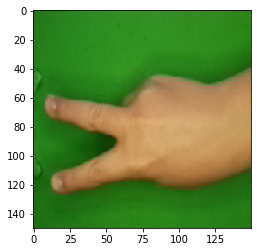

In [19]:
# Input gambar dan prediksi
from keras.preprocessing import image

load = files.upload()

for key in load.keys():
  path = key
  img = image.load_img(path, target_size = (150, 150))
  plot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)

  images = np.vstack([x])
  pred = model.predict(images, batch_size = 10)
  if pred[0][0] == 1:
    print('paper')
  elif pred[0][1] == 1:
    print('rock')
  elif pred[0][2]== 1:
    print('scissors')

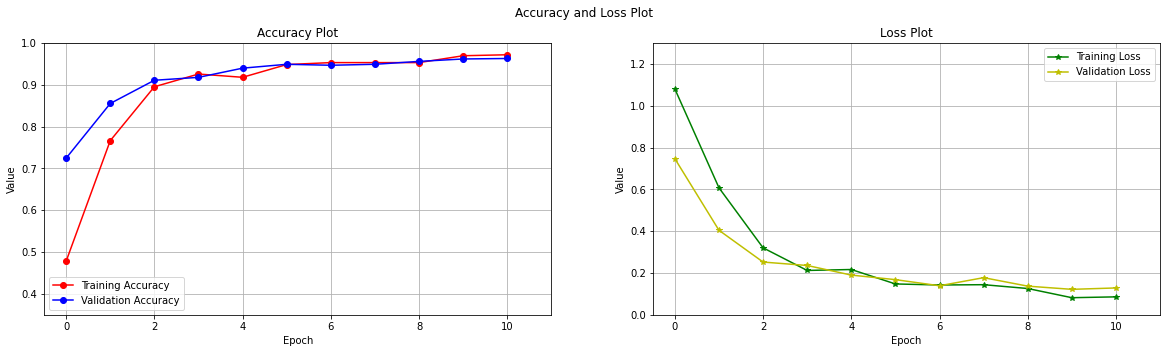

In [20]:
#Visualisasi acc dan loss plot
fig, ax = plt.subplots(1, 2)

fig = plt.gcf()
fig.set_size_inches(20,5)
fig.suptitle('Accuracy and Loss Plot')

for i in range(0, 2):
  if i == 0:
    ax[i].plot(hist.history['accuracy'], 
              'ro-', 
              label = 'Training Accuracy')
    ax[i].plot(hist.history['val_accuracy'],
              'bo-',
              label = 'Validation Accuracy')
    ax[i].set(xlabel = 'Epoch',
              ylabel = 'Value',
              title  = 'Accuracy Plot')
    ax[i].axis([-0.5, 11, 0.35, 1])
    ax[i].legend()
  elif i == 1:
    ax[i].plot(hist.history['loss'], 
              'g*-', 
              label = 'Training Loss')
    ax[i].plot(hist.history['val_loss'],
              'y*-',
              label = 'Validation Loss')
    ax[i].set(xlabel = 'Epoch',
              ylabel = 'Value',
              title  = 'Loss Plot')
    ax[i].axis([-0.5, 11, 0, 1.3])
    ax[i].legend()
  ax[i].grid(True)
plt.show()